## Basic Package

In [1]:
import pandas as pd
import plotly as ply 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from itertools import product
warnings.filterwarnings('ignore')

## Modelling

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Preprocessing

In [3]:
data = pd.read_excel('~/Downloads/Heart F.xlsx')

In [4]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Subset

In [6]:
df = data
df = df[['age', 'creatinine_phosphokinase' ,'ejection_fraction','platelets','serum_creatinine','serum_sodium' , 'DEATH_EVENT']]
df.head(9)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,75.0,582,20,265000.00,1.9,130,1
1,55.0,7861,38,263358.03,1.1,136,1
2,65.0,146,20,162000.00,1.3,129,1
3,50.0,111,20,210000.00,1.9,137,1
4,65.0,160,20,327000.00,2.7,116,1
5,90.0,47,40,204000.00,2.1,132,1
6,75.0,246,15,127000.00,1.2,137,1
7,60.0,315,60,454000.00,1.1,131,1
8,65.0,157,65,263358.03,1.5,138,1


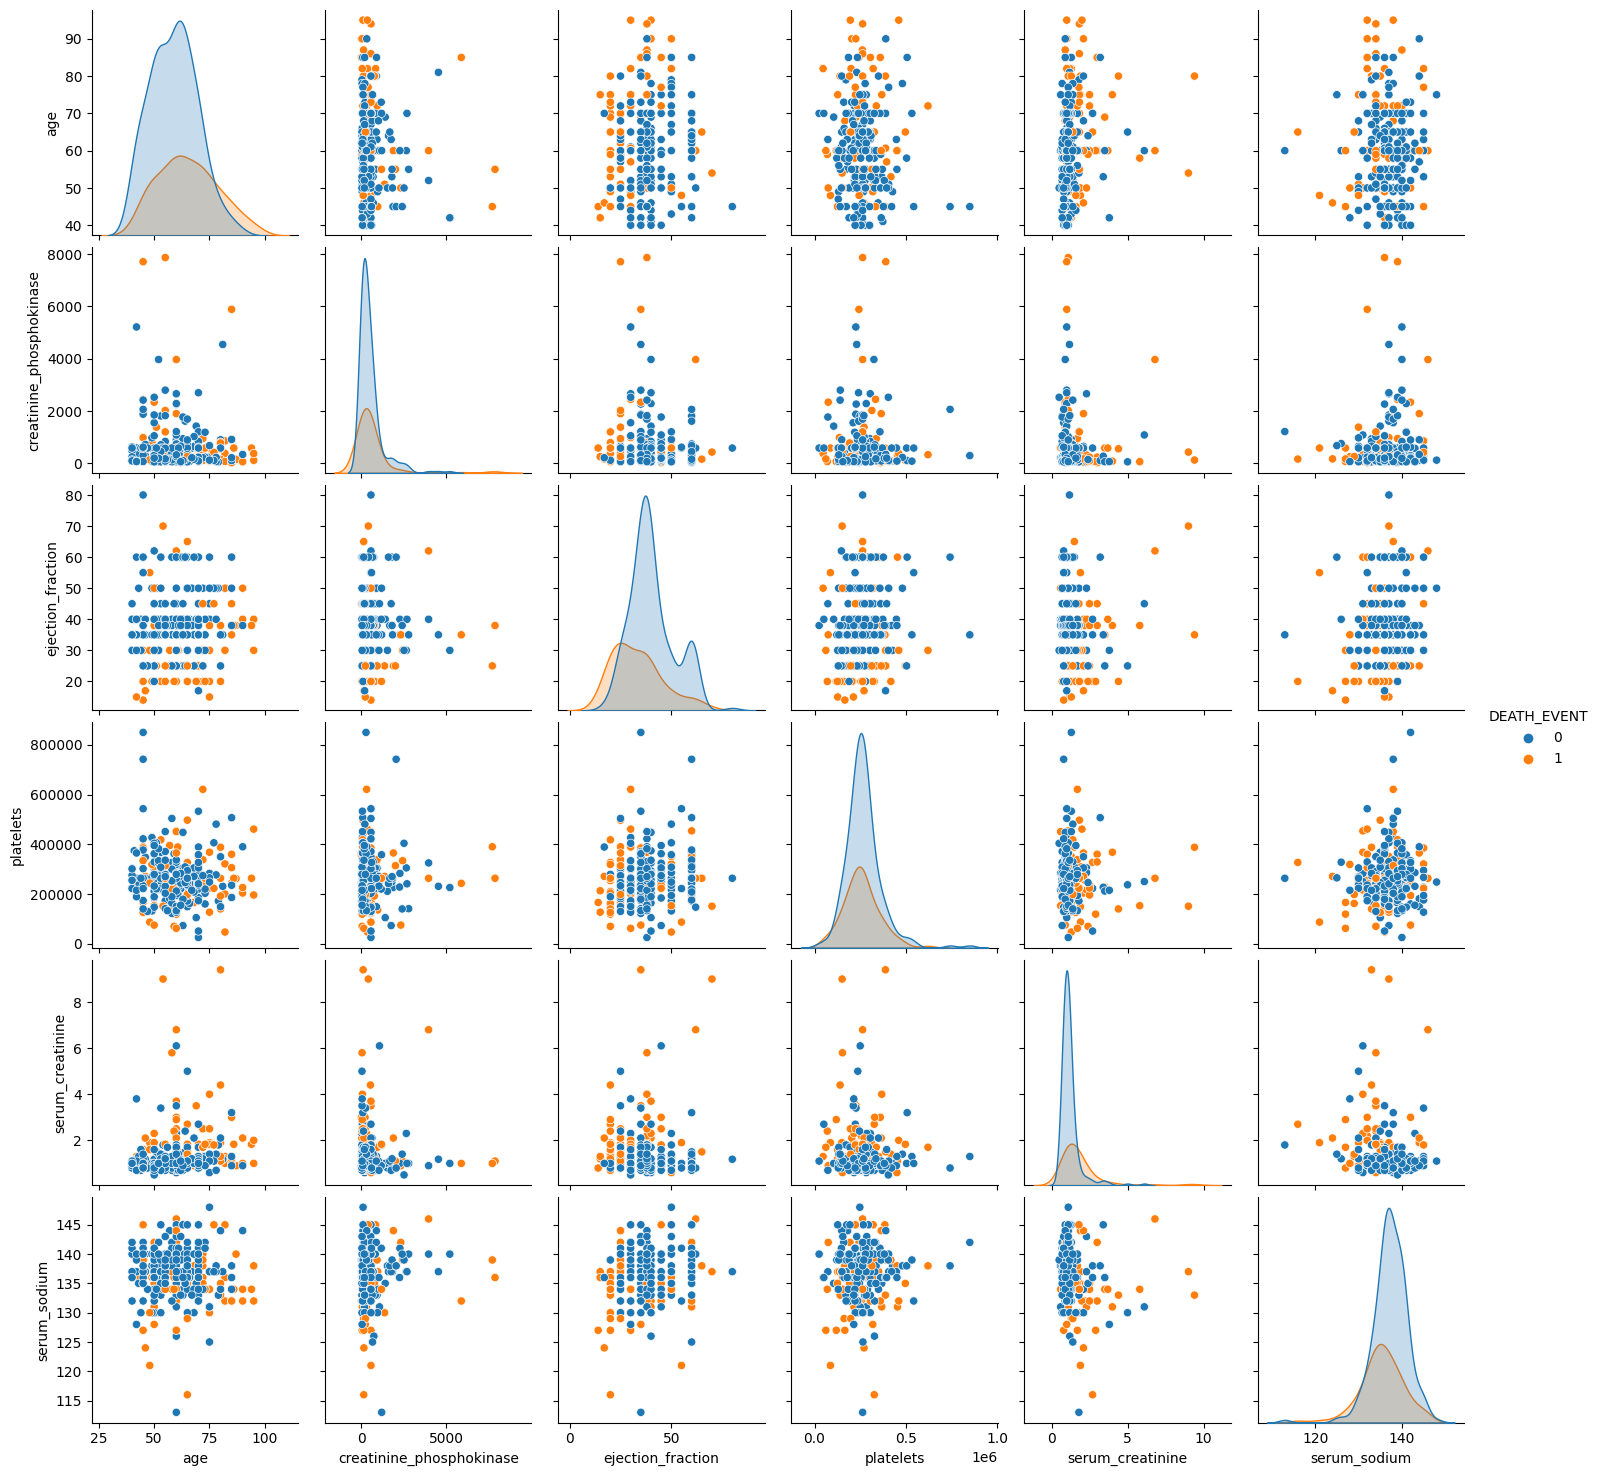

In [7]:
sns.pairplot(df , markers='o' , diag_kind='kde' , hue='DEATH_EVENT')

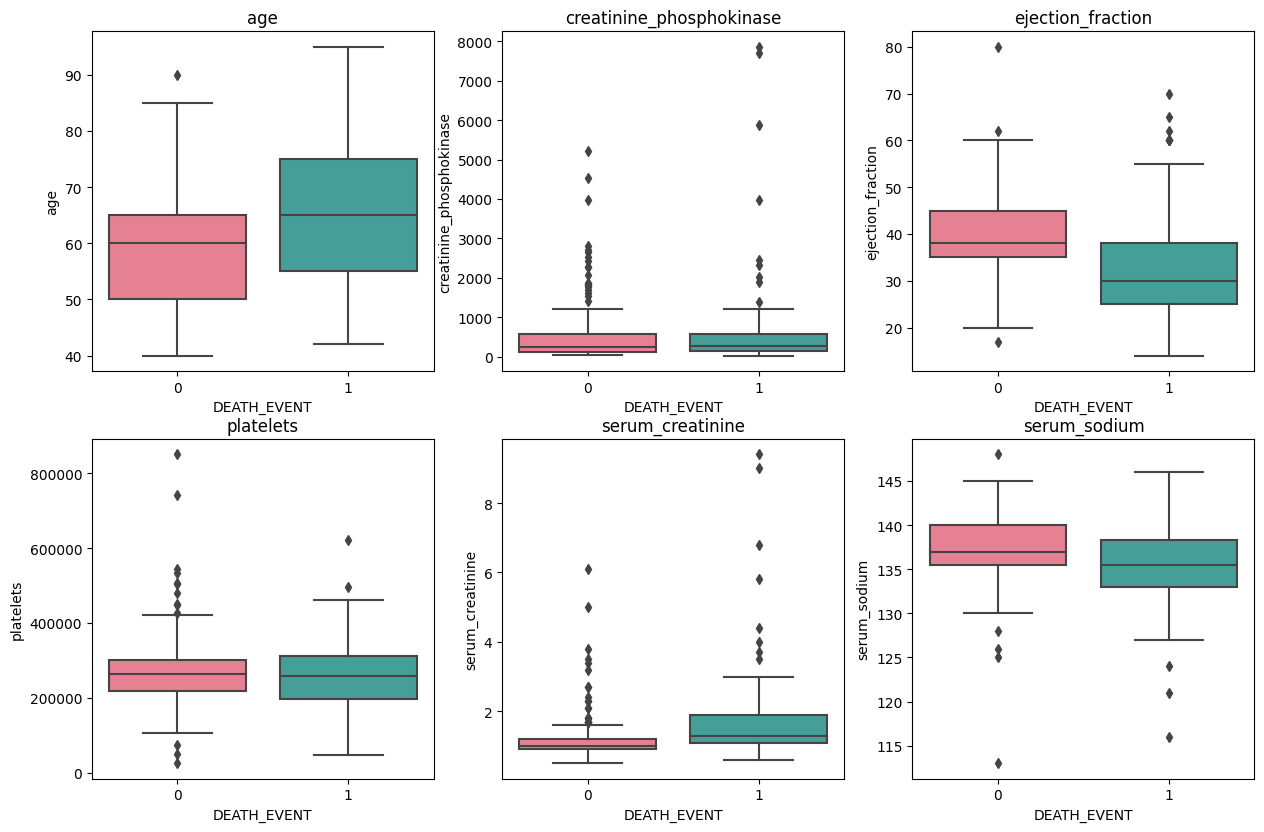

In [8]:
fig, axes = plt.subplots(3,3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(df.iloc[:, :6].columns):
    sns.boxplot(x='DEATH_EVENT', y=column, data=df, palette='husl', ax=axes[i])
    axes[i].set_title(column)

for j in range(i+1, 3*3):
    fig.delaxes(axes[j])



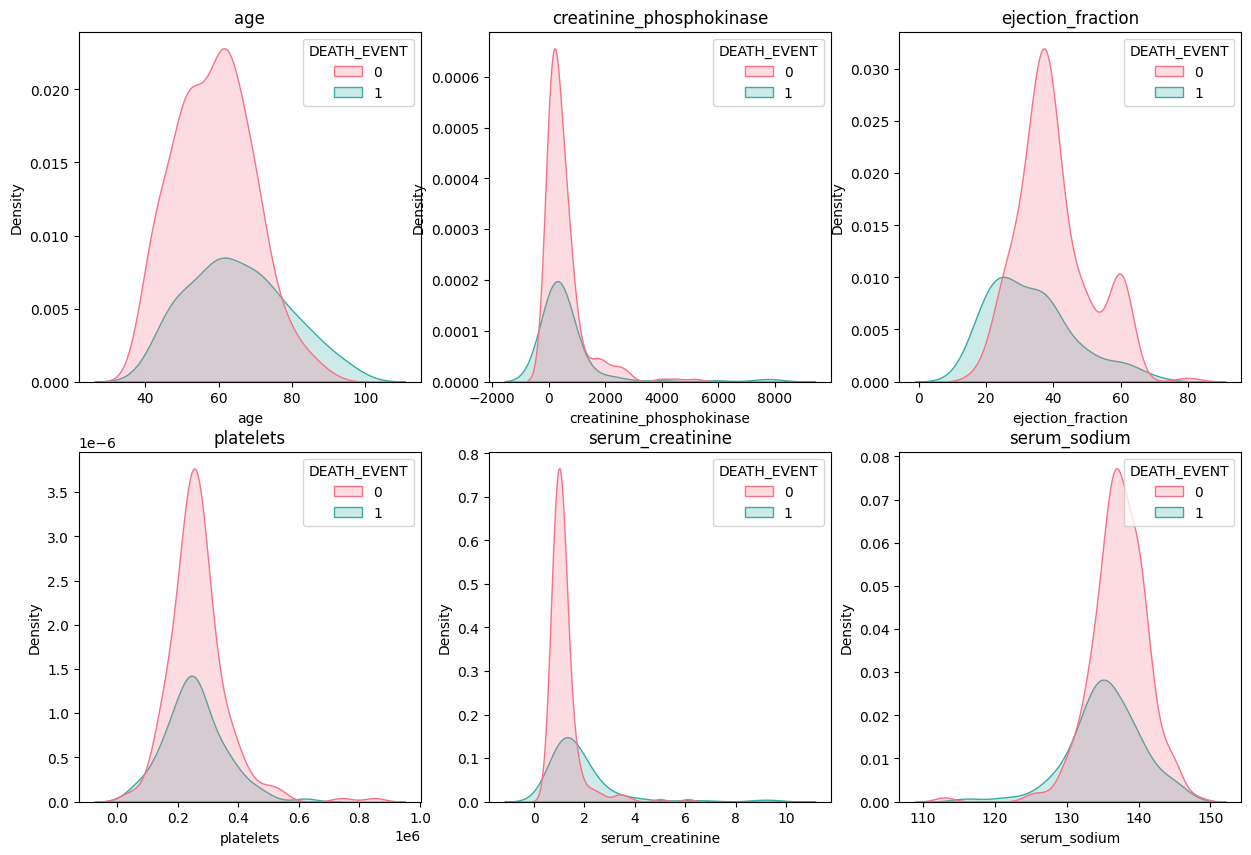

In [9]:
columns_to_plot = [col for col in df.columns if col != 'DEATH_EVENT']

num_columns = len(columns_to_plot)
num_rows = (num_columns + 2) // 3 

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.kdeplot(data=df, x=column, hue='DEATH_EVENT', ax=axes[i], palette='husl', shade=True)
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


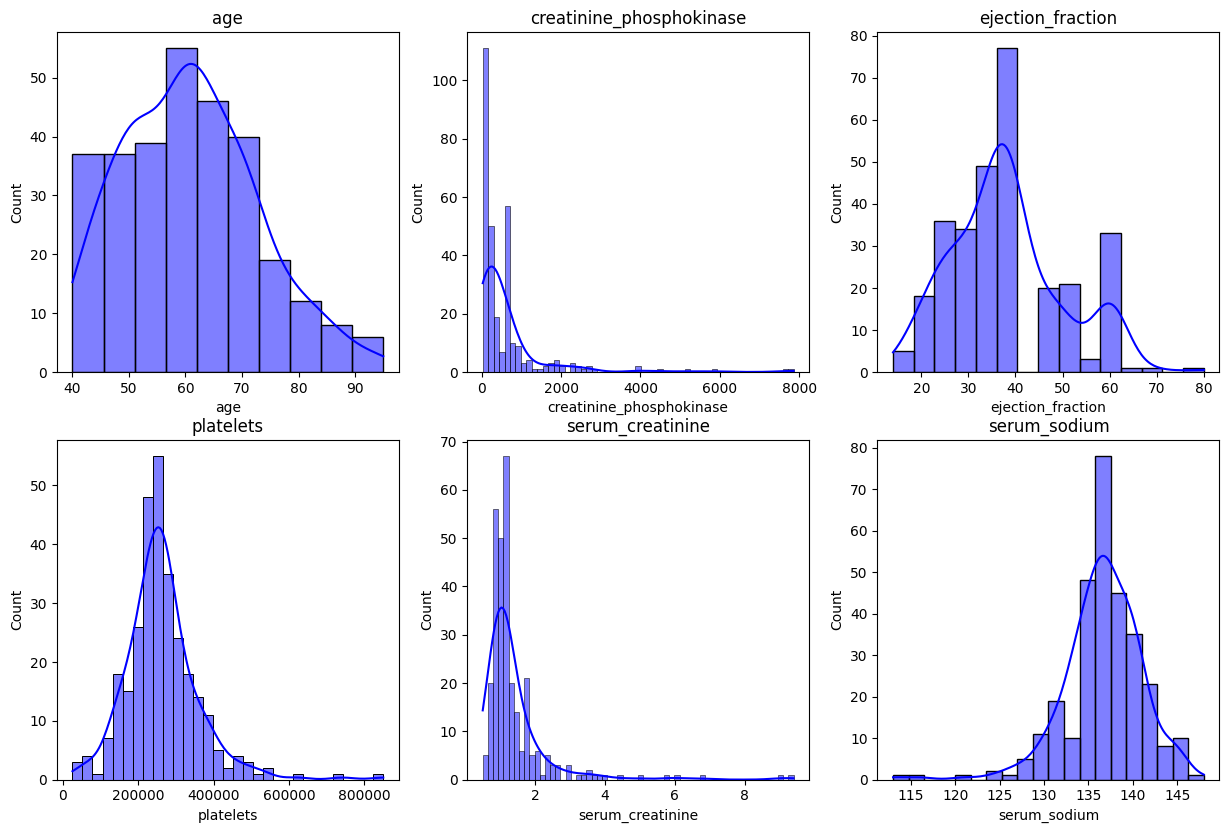

In [10]:
fig, axes = plt.subplots(3,3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(df.iloc[:, :6].columns):
    sns.histplot(x=column, data=df, color='blue', ax=axes[i], kde=True)
    axes[i].set_title(column)

for j in range(i+1, 3*3):
    fig.delaxes(axes[j])



In [11]:
from scipy.stats import shapiro

for column in df.columns:
    stat, p_value = shapiro(df[column])
    print(f"Column: {column}")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    if p_value > 0.05:
        print("The data is normally distributed (fail to reject H0)")
    else:
        print("The data is not normally distributed (reject H0)")
    print()

Column: age
Test Statistic: 0.9754688143730164
P-value: 5.3476593166124076e-05
The data is not normally distributed (reject H0)

Column: creatinine_phosphokinase
Test Statistic: 0.5142635107040405
P-value: 7.050409673673794e-28
The data is not normally distributed (reject H0)

Column: ejection_fraction
Test Statistic: 0.9473156332969666
P-value: 7.214890906936944e-09
The data is not normally distributed (reject H0)

Column: platelets
Test Statistic: 0.9115097522735596
P-value: 2.8836191247327836e-12
The data is not normally distributed (reject H0)

Column: serum_creatinine
Test Statistic: 0.5514661073684692
P-value: 5.3927583038658e-27
The data is not normally distributed (reject H0)

Column: serum_sodium
Test Statistic: 0.9390308856964111
P-value: 9.220169072676754e-10
The data is not normally distributed (reject H0)

Column: DEATH_EVENT
Test Statistic: 0.5881408452987671
P-value: 4.5818434207772147e-26
The data is not normally distributed (reject H0)



## X dan Y , Train Split 

In [12]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , random_state=42)

## Model

In [14]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    results.append({
        "Model": model_name,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

results = pd.DataFrame(results)
results


,Model,F1 Score,ROC AUC
0,Random Forest,0.400000,0.699074
1,Naive Bayes,0.352941,0.740741
2,XGBoost,0.315789,0.694444
3,AdaBoost,0.476190,0.597222
4,Extra Trees,0.315789,0.726852


## Binning

In [15]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}


**Decision Tree Binning**

In [16]:
def decision_tree_binning(X_train, X_test, y_train, max_leaf_nodes):
    binned_X_train = X_train.copy()
    binned_X_test = X_test.copy()
    
    for col in X_train.columns:
        dt = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
        dt.fit(X_train[[col]], y_train)
        binned_X_train[col] = dt.apply(X_train[[col]])
        binned_X_test[col] = dt.apply(X_test[[col]])
    
    return binned_X_train, binned_X_test

results = []

for model_name, model in models.items():
    for max_leaf_nodes in range(2, 6):
        binned_X_train, binned_X_test = decision_tree_binning(X_train, X_test, y_train, max_leaf_nodes)
        
        model.fit(binned_X_train, y_train)
    
        y_pred = model.predict(binned_X_test)
        y_prob = model.predict_proba(binned_X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        
        results.append({
            "Model": model_name,
            "Max Leaf Nodes": max_leaf_nodes,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        })

results_df1 = pd.DataFrame(results)
results_df1


,Model,Max Leaf Nodes,F1 Score,ROC AUC
0,Random Forest,2,0.333333,0.509259
1,Random Forest,3,0.400000,0.652778
2,Random Forest,4,0.400000,0.703704
3,Random Forest,5,0.400000,0.678241
4,Naive Bayes,2,0.133333,0.643519
5,Naive Bayes,3,0.235294,0.652778
6,Naive Bayes,4,0.222222,0.712963
7,Naive Bayes,5,0.133333,0.752315
8,XGBoost,2,0.235294,0.462963
9,XGBoost,3,0.300000,0.597222


In [17]:
#By ROC AUC
best1 = results_df1.loc[results_df1.groupby('Model')['ROC AUC'].idxmax()]
best1.reset_index(drop=True, inplace=True)
best1

,Model,Max Leaf Nodes,F1 Score,ROC AUC
0,AdaBoost,3,0.315789,0.699074
1,Extra Trees,4,0.315789,0.694444
2,Naive Bayes,5,0.133333,0.752315
3,Random Forest,4,0.400000,0.703704
4,XGBoost,4,0.476190,0.666667


In [18]:
#By F1 Score
best1f = results_df1.loc[results_df1.groupby('Model')['F1 Score'].idxmax()]
best1f.reset_index(drop=True, inplace=True)
best1f

,Model,Max Leaf Nodes,F1 Score,ROC AUC
0,AdaBoost,4,0.421053,0.685185
1,Extra Trees,3,0.421053,0.643519
2,Naive Bayes,3,0.235294,0.652778
3,Random Forest,3,0.400000,0.652778
4,XGBoost,5,0.521739,0.648148


**Equal Width Binning(Uniform Binning)**

In [19]:
def equal_width_binning(X_train, X_test, n_bins):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform' , random_state=42)
    binned_X_train = discretizer.fit_transform(X_train)
    binned_X_test = discretizer.transform(X_test)
    return binned_X_train, binned_X_test

results = []

for model_name, model in models.items():
    for n_bins in range(2, 6):
        binned_X_train, binned_X_test = equal_width_binning(X_train, X_test, n_bins)
    
        model.fit(binned_X_train, y_train)

        y_pred = model.predict(binned_X_test)
        y_prob = model.predict_proba(binned_X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
      
        results.append({
            "Model": model_name,
            "Number of Bins": n_bins,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        })

results_df2 = pd.DataFrame(results)
results_df2

,Model,Number of Bins,F1 Score,ROC AUC
0,Random Forest,2,0.444444,0.687500
1,Random Forest,3,0.500000,0.833333
2,Random Forest,4,0.000000,0.722222
3,Random Forest,5,0.600000,0.708333
4,Naive Bayes,2,0.285714,0.724537
5,Naive Bayes,3,0.266667,0.768519
6,Naive Bayes,4,0.444444,0.745370
7,Naive Bayes,5,0.333333,0.666667
8,XGBoost,2,0.526316,0.687500
9,XGBoost,3,0.500000,0.796296


In [20]:
#By ROC AUC
best2 = results_df2.loc[results_df2.groupby('Model')['ROC AUC'].idxmax()]
best2.reset_index(drop=True, inplace=True)
best2

,Model,Number of Bins,F1 Score,ROC AUC
0,AdaBoost,3,0.500000,0.851852
1,Extra Trees,3,0.500000,0.814815
2,Naive Bayes,3,0.266667,0.768519
3,Random Forest,3,0.500000,0.833333
4,XGBoost,3,0.500000,0.796296


In [21]:
#By F1 Score
best2f = results_df2.loc[results_df2.groupby('Model')['F1 Score'].idxmax()]
best2f.reset_index(drop=True, inplace=True)
best2f

,Model,Number of Bins,F1 Score,ROC AUC
0,AdaBoost,3,0.500000,0.851852
1,Extra Trees,5,0.555556,0.675926
2,Naive Bayes,4,0.444444,0.745370
3,Random Forest,5,0.600000,0.708333
4,XGBoost,5,0.571429,0.712963


**Equal Frequency Binning(Quantile Binning)**

In [22]:
def equal_frequency_binning(X_train, X_test, n_bins):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    binned_X_train = discretizer.fit_transform(X_train)
    binned_X_test = discretizer.transform(X_test)
    return binned_X_train, binned_X_test

results = []

for model_name, model in models.items():
    for n_bins in range(2, 6):
      
        binned_X_train, binned_X_test = equal_frequency_binning(X_train, X_test, n_bins)
       
        model.fit(binned_X_train, y_train)
        
        y_pred = model.predict(binned_X_test)
        y_prob = model.predict_proba(binned_X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
       
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        
        results.append({
            "Model": model_name,
            "Number of Bins": n_bins,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        })


results_df3 = pd.DataFrame(results)
results_df3



,Model,Number of Bins,F1 Score,ROC AUC
0,Random Forest,2,0.250000,0.625000
1,Random Forest,3,0.375000,0.763889
2,Random Forest,4,0.500000,0.719907
3,Random Forest,5,0.571429,0.766204
4,Naive Bayes,2,0.476190,0.615741
5,Naive Bayes,3,0.600000,0.759259
6,Naive Bayes,4,0.421053,0.754630
7,Naive Bayes,5,0.500000,0.777778
8,XGBoost,2,0.333333,0.629630
9,XGBoost,3,0.470588,0.699074


In [23]:
#By ROC AUC
best3 = results_df3.loc[results_df3.groupby('Model')['ROC AUC'].idxmax()]
best3.reset_index(drop=True, inplace=True)
best3

,Model,Number of Bins,F1 Score,ROC AUC
0,AdaBoost,3,0.555556,0.824074
1,Extra Trees,5,0.571429,0.747685
2,Naive Bayes,5,0.500000,0.777778
3,Random Forest,5,0.571429,0.766204
4,XGBoost,4,0.608696,0.736111


In [24]:
#By F1 Score
best3f = results_df3.loc[results_df3.groupby('Model')['F1 Score'].idxmax()]
best3f.reset_index(drop=True, inplace=True)
best3f

,Model,Number of Bins,F1 Score,ROC AUC
0,AdaBoost,3,0.555556,0.824074
1,Extra Trees,5,0.571429,0.747685
2,Naive Bayes,3,0.600000,0.759259
3,Random Forest,5,0.571429,0.766204
4,XGBoost,5,0.615385,0.722222


**K-Means Binning**

In [25]:
def kmeans_binning(X_train, X_test, n_clusters):
    binned_X_train = X_train.copy()
    binned_X_test = X_test.copy()
    
    for col in X_train.columns:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_train[[col]])
        binned_X_train[col] = kmeans.predict(X_train[[col]])
        binned_X_test[col] = kmeans.predict(X_test[[col]])
    
    return binned_X_train, binned_X_test

results_kmeans = []

for model_name, model in models.items():
    for n_clusters in range(2, 6):
        binned_X_train, binned_X_test = kmeans_binning(X_train, X_test, n_clusters)
        
        model.fit(binned_X_train, y_train)
        
        y_pred = model.predict(binned_X_test)
        y_prob = model.predict_proba(binned_X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        
        results_kmeans.append({
            "Model": model_name,
            "Number of Clusters": n_clusters,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        })

results_df4 = pd.DataFrame(results_kmeans)
results_df4



,Model,Number of Clusters,F1 Score,ROC AUC
0,Random Forest,2,0.352941,0.787037
1,Random Forest,3,0.400000,0.652778
2,Random Forest,4,0.500000,0.643519
3,Random Forest,5,0.434783,0.712963
4,Naive Bayes,2,0.375000,0.597222
5,Naive Bayes,3,0.315789,0.587963
6,Naive Bayes,4,0.400000,0.671296
7,Naive Bayes,5,0.133333,0.500000
8,XGBoost,2,0.352941,0.787037
9,XGBoost,3,0.421053,0.680556


In [26]:
#By ROC AUC
best4 = results_df4.loc[results_df4.groupby('Model')['ROC AUC'].idxmax()]
best4.reset_index(drop=True, inplace=True)
best4

,Model,Number of Clusters,F1 Score,ROC AUC
0,AdaBoost,4,0.500000,0.750000
1,Extra Trees,2,0.375000,0.787037
2,Naive Bayes,4,0.400000,0.671296
3,Random Forest,2,0.352941,0.787037
4,XGBoost,2,0.352941,0.787037


In [27]:
#By F1 Score
best4f = results_df4.loc[results_df4.groupby('Model')['F1 Score'].idxmax()]
best4f.reset_index(drop=True, inplace=True)
best4f

,Model,Number of Clusters,F1 Score,ROC AUC
0,AdaBoost,5,0.521739,0.715278
1,Extra Trees,5,0.560000,0.692130
2,Naive Bayes,4,0.400000,0.671296
3,Random Forest,4,0.500000,0.643519
4,XGBoost,4,0.500000,0.569444


## Optimal Bins

In [28]:
model = AdaBoostClassifier(random_state=42)

In [29]:
def equal_width_binning(X_train, X_test, n_bins):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform' , random_state=42)
    binned_X_train = discretizer.fit_transform(X_train)
    binned_X_test = discretizer.transform(X_test)
    return binned_X_train, binned_X_test

In [30]:
n_bins_range = range(2, 6)  
columns = X.columns
all_combinations = list(product(n_bins_range, repeat=len(columns)))

results = []

for combination in all_combinations:
    X_train_binned = X_train.copy()
    X_test_binned = X_test.copy()
    
    for i, n_bins in enumerate(combination):
        col = columns[i]
        X_train_binned[[col]], X_test_binned[[col]] = equal_width_binning(X_train[[col]], X_test[[col]], n_bins)

    model.fit(X_train_binned, y_train)
    y_pred = model.predict_proba(X_test_binned)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    result = list(combination) + [roc_auc]
    results.append(result)

results_df = pd.DataFrame(results, columns=[f'n_bins_{col}' for col in columns] + ['roc_auc'])



In [31]:
results_df.head(9)

,n_bins_age,n_bins_creatinine_phosphokinase,n_bins_ejection_fraction,n_bins_platelets,n_bins_serum_creatinine,n_bins_serum_sodium,roc_auc
0,2,2,2,2,2,2,0.706019
1,2,2,2,2,2,3,0.787037
2,2,2,2,2,2,4,0.726852
3,2,2,2,2,2,5,0.803241
4,2,2,2,2,3,2,0.706019
5,2,2,2,2,3,3,0.787037
6,2,2,2,2,3,4,0.722222
7,2,2,2,2,3,5,0.798611
8,2,2,2,2,4,2,0.696759


In [32]:
hasil = results_df

In [33]:
hasil

,n_bins_age,n_bins_creatinine_phosphokinase,n_bins_ejection_fraction,n_bins_platelets,n_bins_serum_creatinine,n_bins_serum_sodium,roc_auc
0,2,2,2,2,2,2,0.706019
1,2,2,2,2,2,3,0.787037
2,2,2,2,2,2,4,0.726852
3,2,2,2,2,2,5,0.803241
4,2,2,2,2,3,2,0.706019
...,...,...,...,...,...,...,...
4091,5,5,5,5,4,5,0.775463
4092,5,5,5,5,5,2,0.680556
4093,5,5,5,5,5,3,0.701389
4094,5,5,5,5,5,4,0.678241


In [34]:
hasil['roc_auc'].max()

0.9074074074074074

In [35]:
hasil[hasil['roc_auc'] == 0.9074074074074074]

,n_bins_age,n_bins_creatinine_phosphokinase,n_bins_ejection_fraction,n_bins_platelets,n_bins_serum_creatinine,n_bins_serum_sodium,roc_auc
327,2,3,3,2,3,5,0.907407


## FINAL DATA

In [36]:
def uniform_binning(X, n_bins):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform', random_state=42)
    binned_X = discretizer.fit_transform(X)
    return binned_X

def optimal_binning(X, binning_dict):
    X_binned = X.copy()
    
    for column, n_bins in binning_dict.items():
        X_binned[[column]] = uniform_binning(X[[column]], n_bins)
    
    return X_binned

In [37]:
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

optimal_bins = {
    'age': 2,
    'creatinine_phosphokinase': 3,
    'ejection_fraction': 3,
    'platelets': 2,
    'serum_creatinine': 3,
    'serum_sodium': 5
}

X_binned = optimal_binning(X, optimal_bins)



In [38]:
X_binned

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.0,0.0,0.0,0.0,0.0,2.0
1,0.0,2.0,1.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
294,0.0,0.0,1.0,0.0,0.0,4.0
295,0.0,0.0,1.0,0.0,0.0,3.0
296,0.0,0.0,2.0,1.0,0.0,3.0
297,0.0,0.0,1.0,0.0,0.0,3.0


In [39]:
X_binned.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')

In [40]:
final_data = data.copy()

In [41]:
final_data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 
'platelets','serum_creatinine', 'serum_sodium']] = X_binned[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
'serum_creatinine', 'serum_sodium']]

In [42]:
final_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.0,0,0.0,0,0.0,1,0.0,0.0,2.0,1,0,4,1
1,0.0,0,2.0,0,1.0,0,0.0,0.0,3.0,1,0,6,1
2,0.0,0,0.0,0,0.0,0,0.0,0.0,2.0,1,1,7,1
3,0.0,1,0.0,0,0.0,0,0.0,0.0,3.0,1,0,7,1
4,0.0,1,0.0,1,0.0,0,0.0,0.0,0.0,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.0,0,0.0,1,1.0,1,0.0,0.0,4.0,1,1,270,0
295,0.0,0,0.0,0,1.0,0,0.0,0.0,3.0,0,0,271,0
296,0.0,0,0.0,1,2.0,0,1.0,0.0,3.0,0,0,278,0
297,0.0,0,0.0,0,1.0,0,0.0,0.0,3.0,1,1,280,0


2	3	3	2	3	5

In [43]:
age = pd.concat([final_data['age'], data['age']], axis=1)
creatinine = pd.concat([final_data['creatinine_phosphokinase'], data['creatinine_phosphokinase']], axis=1)
ejection= pd.concat([final_data['ejection_fraction'], data['ejection_fraction']], axis=1)
platelets = pd.concat([final_data['platelets'], data['platelets']], axis=1)
serum_creatinine = pd.concat([final_data['serum_creatinine'], data['serum_creatinine']], axis=1)
serum_sodium = pd.concat([final_data['serum_sodium'], data['serum_sodium']], axis=1)

**AGE**

In [44]:
age.iloc[:,0].value_counts()

age
0.0    214
1.0     85
Name: count, dtype: int64

In [45]:
age[age.iloc[:,0] == 1].min()

age     1.0
age    68.0
dtype: float64

**Creatinine**

In [46]:
creatinine.iloc[:,0].value_counts()

creatinine_phosphokinase
0.0    289
1.0      7
2.0      3
Name: count, dtype: int64

In [47]:
print(creatinine[creatinine.iloc[:,0] == 0].min(),creatinine[creatinine.iloc[:,0] == 0].max())

creatinine_phosphokinase     0.0
creatinine_phosphokinase    23.0
dtype: float64 creatinine_phosphokinase       0.0
creatinine_phosphokinase    2522.0
dtype: float64


In [48]:
print(creatinine[creatinine.iloc[:,0] == 1].min(),creatinine[creatinine.iloc[:,0] == 1].max())

creatinine_phosphokinase       1.0
creatinine_phosphokinase    2656.0
dtype: float64 creatinine_phosphokinase       1.0
creatinine_phosphokinase    5209.0
dtype: float64


In [49]:
print(creatinine[creatinine.iloc[:,0] == 2].min(),creatinine[creatinine.iloc[:,0] == 2].max())

creatinine_phosphokinase       2.0
creatinine_phosphokinase    5882.0
dtype: float64 creatinine_phosphokinase       2.0
creatinine_phosphokinase    7861.0
dtype: float64


**Ejection**

In [50]:
ejection.iloc[:,0].value_counts()

ejection_fraction
0.0    142
1.0    121
2.0     36
Name: count, dtype: int64

In [51]:
print(ejection[ejection.iloc[:,0] == 0].min(),ejection[ejection.iloc[:,0] == 0].max())

ejection_fraction     0.0
ejection_fraction    14.0
dtype: float64 ejection_fraction     0.0
ejection_fraction    35.0
dtype: float64


In [52]:
print(ejection[ejection.iloc[:,0] == 1].min(),ejection[ejection.iloc[:,0] == 1].max())

ejection_fraction     1.0
ejection_fraction    38.0
dtype: float64 ejection_fraction     1.0
ejection_fraction    55.0
dtype: float64


In [53]:
print(ejection[ejection.iloc[:,0] == 2].min(),ejection[ejection.iloc[:,0] == 2].max())

ejection_fraction     2.0
ejection_fraction    60.0
dtype: float64 ejection_fraction     2.0
ejection_fraction    80.0
dtype: float64


**Platelets**

In [54]:
platelets.iloc[:,0].value_counts()

platelets
0.0    285
1.0     14
Name: count, dtype: int64

In [55]:
print(platelets[platelets.iloc[:,0] == 0].min(),platelets[platelets.iloc[:,0] == 0].max())

platelets        0.0
platelets    25100.0
dtype: float64 platelets         0.0
platelets    427000.0
dtype: float64


In [56]:
print(platelets[platelets.iloc[:,0] == 1].min(),platelets[platelets.iloc[:,0] == 1].max())

platelets         1.0
platelets    448000.0
dtype: float64 platelets         1.0
platelets    850000.0
dtype: float64


**Serum Creatinine**

In [57]:
serum_creatinine.iloc[:,0].value_counts()

serum_creatinine
0.0    287
1.0      9
2.0      3
Name: count, dtype: int64

In [58]:
print(serum_creatinine[serum_creatinine.iloc[:,0] == 0].min(),serum_creatinine[serum_creatinine.iloc[:,0] == 0].max())

serum_creatinine    0.0
serum_creatinine    0.5
dtype: float64 serum_creatinine    0.0
serum_creatinine    3.4
dtype: float64


In [59]:
print(serum_creatinine[serum_creatinine.iloc[:,0] == 1].min(),serum_creatinine[serum_creatinine.iloc[:,0] == 1].max())

serum_creatinine    1.0
serum_creatinine    3.5
dtype: float64 serum_creatinine    1.0
serum_creatinine    6.1
dtype: float64


In [60]:
print(serum_creatinine[serum_creatinine.iloc[:,0] == 2].min(),serum_creatinine[serum_creatinine.iloc[:,0] == 2].max())

serum_creatinine    2.0
serum_creatinine    6.8
dtype: float64 serum_creatinine    2.0
serum_creatinine    9.4
dtype: float64


**Serum Sodium**

In [61]:
serum_sodium.iloc[:,0].value_counts()

serum_sodium
3.0    206
2.0     45
4.0     42
1.0      4
0.0      2
Name: count, dtype: int64

In [62]:
print(serum_sodium[serum_sodium.iloc[:,0] == 0].min(),serum_sodium[serum_sodium.iloc[:,0] == 0].max())

serum_sodium      0.0
serum_sodium    113.0
dtype: float64 serum_sodium      0.0
serum_sodium    116.0
dtype: float64


In [63]:
print(serum_sodium[serum_sodium.iloc[:,0] == 1].min(),serum_sodium[serum_sodium.iloc[:,0] == 1].max())

serum_sodium      1.0
serum_sodium    121.0
dtype: float64 serum_sodium      1.0
serum_sodium    126.0
dtype: float64


In [64]:
print(serum_sodium[serum_sodium.iloc[:,0] == 2].min(),serum_sodium[serum_sodium.iloc[:,0] == 2].max())

serum_sodium      2.0
serum_sodium    127.0
dtype: float64 serum_sodium      2.0
serum_sodium    133.0
dtype: float64


In [65]:
print(serum_sodium[serum_sodium.iloc[:,0] == 3].min(),serum_sodium[serum_sodium.iloc[:,0] == 3].max())

serum_sodium      3.0
serum_sodium    134.0
dtype: float64 serum_sodium      3.0
serum_sodium    140.0
dtype: float64


In [66]:
print(serum_sodium[serum_sodium.iloc[:,0] == 4].min(),serum_sodium[serum_sodium.iloc[:,0] == 4].max())

serum_sodium      4.0
serum_sodium    141.0
dtype: float64 serum_sodium      4.0
serum_sodium    148.0
dtype: float64


In [67]:
final_data.to_excel('Final Data.xlsx', index=False)